# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Aritra Chowdhury

EID: ac79277

Name: Vishu Agarwal

EID: va7729

# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

In [1]:
# Importing the required Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

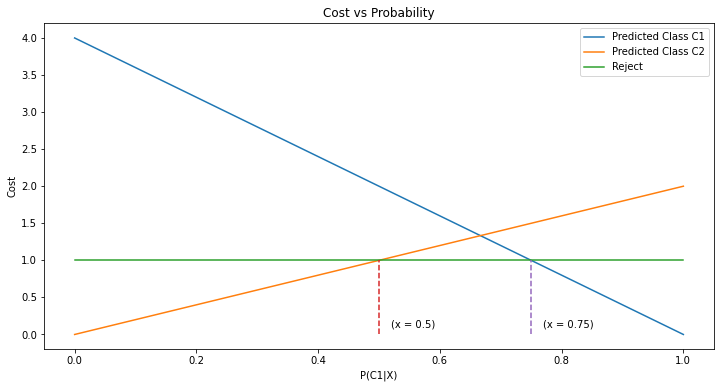

In [2]:
# Storing Loss Matrix in a 2D Array
L = np.array(([0,2],[4,0]))
reject_cost = 1

# Defining the X Axis
x = np.linspace(0,1,100)

# Defining Cost Lines of C1, C2 and Reject
intercept_c1 = L[1][0]                     # Intercept of Predicted Class C1
slope_c1 = (L[0][0] - L[1][0]) / (1 - 0)   # Slope of Predicted Class C1
y_c1 = slope_c1 * x + intercept_c1         # Equation of Predicted Class C1

intercept_c2 = L[1][1]                     # Intercept of Predicted Class C2
slope_c2 = (L[0][1] - L[1][1]) / (1 - 0)   # Slope of Predicted Class C2
y_c2 = slope_c2 * x + intercept_c2         # Equation of Predicted Class C2

y_reject = [reject_cost] * 100                       # Reject Line

# Calculating Intersection Points
first_x_point = min((reject_cost - intercept_c1) / slope_c1, (reject_cost - intercept_c2) / slope_c2)
second_x_point = max((reject_cost - intercept_c1) / slope_c1, (reject_cost - intercept_c2) / slope_c2)

# Plotting C1, C2 and Reject Cost Lines
plt.figure(figsize = (12,6))
plt.plot(x,y_c1, label = 'Predicted Class C1')
plt.plot(x,y_c2, label = 'Predicted Class C2')
plt.plot(x,y_reject, label = 'Reject')
plt.xlabel('P(C1|X)')
plt.ylabel('Cost')
plt.title('Cost vs Probability')
plt.legend()

# Plotting the Decision Rules
x1 = [first_x_point]*100
x2 = [second_x_point]*100
y = np.linspace(0,1,100)
plt.plot(x1,y, '--')
plt.plot(x2,y, '--')
plt.annotate(f'(x = {first_x_point})', xy=(first_x_point, 1), xytext=(first_x_point + 0.02, 0.1))
plt.annotate(f'(x = {second_x_point})', xy=(second_x_point, 1), xytext=(second_x_point + 0.02, 0.1))
plt.show()

Based on the above plot, 
 - Region below x = 0.5 will be classified as C2
 - Region between x = (0.5, 0.75) will be rejected 
 - Region above x = 0.75 will be classified as C1

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [3]:
# Loading the dataset

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer (a):

In [4]:
# Importing the required Libraries
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Defining and Fitting the Model based on Training Data
model = LogisticRegression()
result = model.fit(X_train, y_train)

print('\033[1mPredicting on x_train\033[0m \n')

# Predicting on X_train
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

print('\033[1mPredicting on x_test\033[0m \n')

# Predicting on X_test
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

Predicting on x_train 

              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Predicting on x_test 

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



We get an accuracy of 71% on training data, while a slightly reduced accuracy of 69% on test data

## Answer (b):

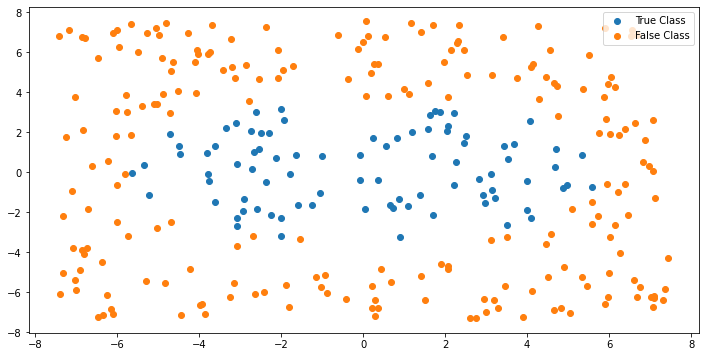

In [6]:
# Plotting a Scatter Plot on X_train
plt.figure(figsize = (12,6))
plt.scatter(X_train[y_train,0], X_train[y_train,1], label = 'True Class')
plt.scatter(X_train[~y_train,0], X_train[~y_train,1], label = 'False Class')
plt.legend()
plt.show()

We observe that the 'True' class has a close to elleptical geometry, centered around the origin. Since Logistic Regression is a linear separator based classifier, it is bound to perform poorly on such a distribution. There is no single line which can separate the above distribute.

## Answer (c): 

Based on the above plot, we perform a 'Square' transformation we will be able to move the entire 'True' class in first quadrant concentrated around the center, hence potentially providing a better accuracy.

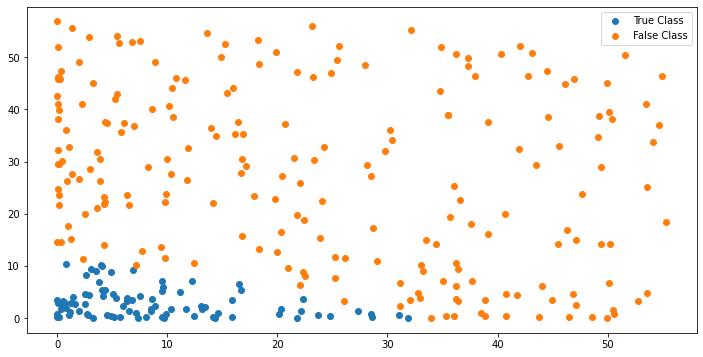

In [7]:
# Performing Square Transformation and Plotting X_train
plt.figure(figsize = (12,6))
plt.scatter(square(X_train[y_train,0]), square(X_train[y_train,1]), label = 'True Class')
plt.scatter(square(X_train[~y_train,0]), square(X_train[~y_train,1]), label = 'False Class')
plt.legend()
plt.show()

Post applying this transformation, True and False classes can be easily separated by a linear separator. Lets try training a logistic regression model and re-evaluating the accuracies. 

In [8]:
# Defining and Fitting the Model on Transformed Data
model = LogisticRegression()
result = model.fit(square(X_train), y_train)

print('\033[1mPredicting on transformed x_train\033[0m \n')

# Predicting on X_train
y_pred_train = model.predict(square(X_train))
print(classification_report(y_train, y_pred_train))

print('\033[1mPredicting on transformed x_test\033[0m \n')

# Predicting on X_test
y_pred_test = model.predict(square(X_test))
print(classification_report(y_test, y_pred_test))

Predicting on transformed x_train 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Predicting on transformed x_test 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



We obtain 99% accuracy on training data and 100% accuracy on test data post applying the trainsformation. Hence, our transformation did work!

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [9]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:

$$ P(A,B,C,D,E,F) = P(A)P(B|A)P(C|A,E)P(D|B)P(E|B)P(F|C,D,E) $$

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer (a):

In [10]:
# Importing the required Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

We use the Pima Diabetes dataset. 

In [11]:
# Loading the Pima Diabetes dataset
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X_pima, y_pima = load_diabetes()

# Loading the Adult Census dataset
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X_adult, y_adult = load_adult()

# creating training and test data set 
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.33, random_state=42)
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, test_size=0.33, random_state=42)

In [12]:
#################################### Training Random Forest model ###################################################

# Fitting the Model
rf_pima = RandomForestClassifier(n_estimators=50, random_state = 10).fit(X_train_pima,y_train_pima)
rf_adult = RandomForestClassifier(n_estimators=50, random_state = 10).fit(X_train_adult,y_train_adult)

# Predicting on Train Data
y_pred_rf_train_pima = rf_pima.predict(X_train_pima)
y_pred_rf_train_adult = rf_adult.predict(X_train_adult)

# Predicting on Test Data
y_pred_rf_test_pima = rf_pima.predict(X_test_pima)
y_pred_rf_test_adult = rf_adult.predict(X_test_adult)
    
######################################## Training MLP ###############################################################

# Fitting the Model
mlp_pima = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pima, y_train_pima)
mlp_adult = MLPClassifier(random_state=1, max_iter=300).fit(X_train_adult, y_train_adult)

# Predicting on Train Data
y_pred_mlp_train_pima = mlp_pima.predict(X_train_pima)
y_pred_mlp_train_adult = mlp_adult.predict(X_train_adult)

# Predicting on Test Data
y_pred_mlp_test_pima = mlp_pima.predict(X_test_pima)
y_pred_mlp_test_adult = mlp_adult.predict(X_test_adult)

##################################### Training Logistic Regression ##################################################

# Fitting the Model
logreg_pima = LogisticRegression().fit(X_train_pima,y_train_pima)
logreg_adult = LogisticRegression().fit(X_train_adult,y_train_adult)

# Predicting on Train Data
y_pred_lr_train_pima = logreg_pima.predict(X_train_pima)
y_pred_lr_train_adult = logreg_adult.predict(X_train_adult)

# Predicting on Test Data
y_pred_lr_test_pima = logreg_pima.predict(X_test_pima)
y_pred_lr_test_adult = logreg_adult.predict(X_test_adult)

In [13]:
# Summarizing the Accuracies obtained
df_accuracy = pd.DataFrame(columns = ['Model', 'Train Accuracy (Pima Diabetes)', 'Test Accuracy (Pima Diabetes)', 'Train Accuracy (Adult Census)', 'Test Accuracy (Adult Census)'])

# Random Forest Accuracies
df_accuracy = df_accuracy.append({'Model': 'Random forest', 
                                  'Train Accuracy (Pima Diabetes)': metrics.accuracy_score(y_train_pima, y_pred_rf_train_pima), 
                                  'Test Accuracy (Pima Diabetes)': metrics.accuracy_score(y_test_pima, y_pred_rf_test_pima),
                                  'Train Accuracy (Adult Census)': metrics.accuracy_score(y_train_adult, y_pred_rf_train_adult), 
                                  'Test Accuracy (Adult Census)': metrics.accuracy_score(y_test_adult, y_pred_rf_test_adult)}
                                  ,ignore_index = True)

# MLP Accuracies
df_accuracy = df_accuracy.append({'Model': 'MLP', 
                                  'Train Accuracy (Pima Diabetes)': metrics.accuracy_score(y_train_pima, y_pred_mlp_train_pima), 
                                  'Test Accuracy (Pima Diabetes)': metrics.accuracy_score(y_test_pima, y_pred_mlp_test_pima),
                                  'Train Accuracy (Adult Census)': metrics.accuracy_score(y_train_adult, y_pred_mlp_train_adult), 
                                  'Test Accuracy (Adult Census)': metrics.accuracy_score(y_test_adult, y_pred_mlp_test_adult)}
                                  ,ignore_index = True)

# Logistic Regression Accuracies
df_accuracy = df_accuracy.append({'Model': 'Logistic Regression', 
                                  'Train Accuracy (Pima Diabetes)': metrics.accuracy_score(y_train_pima, y_pred_lr_train_pima), 
                                  'Test Accuracy (Pima Diabetes)': metrics.accuracy_score(y_test_pima, y_pred_lr_test_pima),
                                  'Train Accuracy (Adult Census)': metrics.accuracy_score(y_train_adult, y_pred_lr_train_adult), 
                                  'Test Accuracy (Adult Census)': metrics.accuracy_score(y_test_adult, y_pred_lr_test_adult)} 
                                  ,ignore_index = True)

df_accuracy

,Model,Train Accuracy (Pima Diabetes),Test Accuracy (Pima Diabetes),Train Accuracy (Adult Census),Test Accuracy (Adult Census)
0,Random forest,1.000000,0.732283,0.999542,0.853434
1,MLP,0.768482,0.736220,0.792207,0.796482
2,Logistic Regression,0.780156,0.748031,0.790282,0.792016


## Answer (b):

In [14]:
from sklearn.calibration import calibration_curve

# Calibration Data for Pima Diabetes dataset
rf_pred_pima = rf_pima.predict_proba(X_pima)
mlp_pred_pima = mlp_pima.predict_proba(X_pima)
logreg_pred_pima = logreg_pima.predict_proba(X_pima)

rf_y_pima, rf_x_pima = calibration_curve(y_pima, rf_pred_pima[:,1], n_bins = 10)
mlp_y_pima, mlp_x_pima = calibration_curve(y_pima, mlp_pred_pima[:,1], n_bins = 10)
logreg_y_pima, logreg_x_pima = calibration_curve(y_pima, logreg_pred_pima[:,1], n_bins = 10)

# Calibration Data for Adult Census dataset
rf_pred_adult = rf_adult.predict_proba(X_adult)
mlp_pred_adult = mlp_adult.predict_proba(X_adult)
logreg_pred_adult = logreg_adult.predict_proba(X_adult)

rf_y_adult, rf_x_adult = calibration_curve(y_adult, rf_pred_adult[:,1], n_bins = 10)
mlp_y_adult, mlp_x_adult = calibration_curve(y_adult, mlp_pred_adult[:,1], n_bins = 10)
logreg_y_adult, logreg_x_adult = calibration_curve(y_adult, logreg_pred_adult[:,1], n_bins = 10)

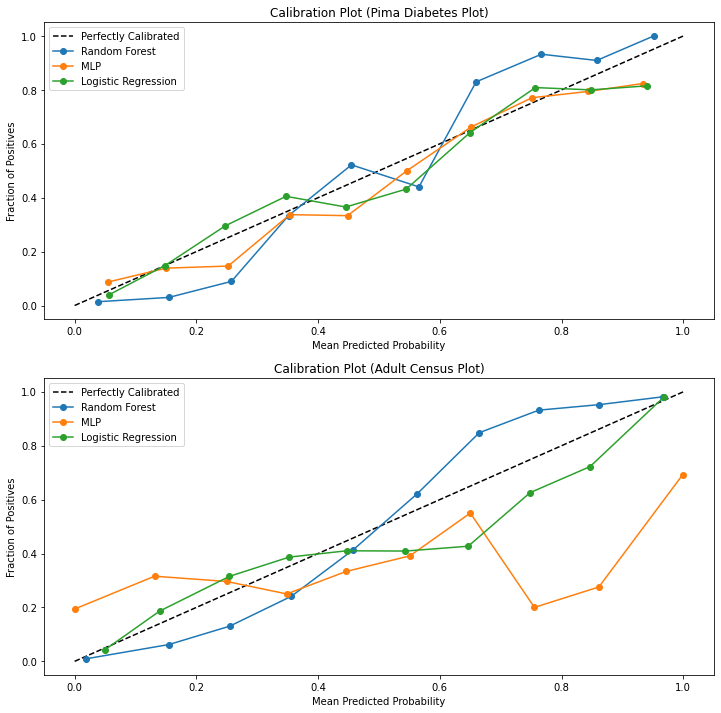

In [15]:
## Importing the required Libraries
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# Plotting the Calibration Curve for both Datasets
x = np.linspace(0,1,100)

fig, (ax1, ax2) = plt.subplots(figsize = (12,12), nrows = 2, ncols = 1)

ax1.plot(x, x, label = 'Perfectly Calibrated', color = 'black', linestyle = '--')
ax1.plot(rf_x_pima, rf_y_pima, marker = 'o', label = 'Random Forest')
ax1.plot(mlp_x_pima, mlp_y_pima, marker = 'o', label = 'MLP')
ax1.plot(logreg_x_pima, logreg_y_pima, marker = 'o', label = 'Logistic Regression')
ax1.set_title('Calibration Plot (Pima Diabetes Plot)')
ax1.set_xlabel('Mean Predicted Probability')
ax1.set_ylabel('Fraction of Positives')
ax1.legend()

ax2.plot(x, x, label = 'Perfectly Calibrated', color = 'black', linestyle = '--')
ax2.plot(rf_x_adult, rf_y_adult, marker = 'o', label = 'Random Forest')
ax2.plot(mlp_x_adult, mlp_y_adult, marker = 'o', label = 'MLP')
ax2.plot(logreg_x_adult, logreg_y_adult, marker = 'o', label = 'Logistic Regression')
ax2.set_title('Calibration Plot (Adult Census Plot)')
ax2.set_xlabel('Mean Predicted Probability')
ax2.set_ylabel('Fraction of Positives')
ax2.legend()

plt.show()

## Answer (c):

In [16]:
import dice_ml
from dice_ml.utils import helpers
import statistics as stat
from statsmodels import robust
from math import comb

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Metric Function: Validity

Validity is simply the fraction of examples returned by a method that are actually counterfactuals. That is, they correspond to a different outcome than the original input. Thus, for a set $C$ of $k$ counterfactuals, Validity is calculated as: 

$$ \%Valid\;CFs = \frac{|\{unique\;instances\;in\;C\;s.t.\;f(c) > 0.5\}|}{k} $$

In [17]:
def validity(df_cf, df_orig, target):
    """
    Function to calculate Validity between a set of Counterfactuals and an Input
    
    Arguments:
        df_cf: Set of Counterfactuals for one Input
        df_orig: Single Input
        target: Target Feature

    Returns: 
        Validity metric (Scalar)
    
    """
    validity = df_cf[target].apply(lambda x: np.abs(x - df_orig[target].iloc[0])).sum() / len(df_cf[target])
    return validity

### Metric Function: Proximity

We define proximity as the mean of feature-wise distances between the CF example and the original input. Proximity for a set of examples is simply the average proximity over all the examples. Thus, for $k$ counterfactuals with $p$ continuous featues, Proximity is calculated as:

$$ Continuous\;Proximity = -\frac{1}{k}\sum_{i=1}^{k}dist\_cont(c_i,x) $$

where Continuous Distance is calculated as:

$$ dist\_cont(c,x) = \frac{1}{d_{cont}}\sum_{p=1}^{d_{cont}}\frac{|c_p - x_p|}{MAD_p} $$

In [18]:
def proximity(df_cf, df_orig, df_train, numerical_cols):
    """
    Function to calculate Proximity between a set of Counterfactuals and an Input. 
    Only calculates Continuous Proximity.
    
    Arguments:
        df_cf: Set of Counterfactuals for one Input
        df_orig: Single Input
        df_train: Training Data for Median Absolute Deviation
        numerical_cols: Set of Continuous Features
    
    Returns: 
        Proximity metric (Scalar)
    
    """
    df_cfp = df_cf[numerical_cols]
    df_main = df_train[numerical_cols]
    df_orgp = df_orig[numerical_cols]
    finsm = 0
    for i in range(len(df_cfp)):
        sm = 0
        
        # Calculation of Continuous Distance Function
        for p in range(len(df_cfp.columns.to_list())):
            mad_p = robust.mad(df_main.iloc[:,p])
            # Handling cases of Extreme Outlier Frequencies, i.e. MAD = 0
            if mad_p == 0:
                mad_p = 1
            term = np.abs((df_cfp.iloc[:,p].iloc[i]) - (df_orgp.iloc[:,p].iloc[0])) / mad_p
            sm = sm + term
        sm = sm / len(df_cfp.columns.to_list())
        
        finsm = finsm + sm

    finsm = finsm * (-1) / len(df_cfp)
    return finsm

### Metric Function: Sparsity

We define sparsity as the number of changes between the original input and a generated counterfactual. Thus, for $k$ counterfactuals with $d$ input features, Sparsity is calculated as:

$$ Sparsity = 1 - \frac{1}{kd}\sum_{i=1}^{k}\sum_{l=1}^{d} I(c_i^l \neq x_i^l) $$

In [19]:
def sparsity(df_cf, df_orig):
    """
    Function to calculate Sparsity between a set of Counterfactuals and an Input
    
    Arguments:
        df_cf: Set of Counterfactuals for one Input
        df_orig: Single Input
    
    Returns: 
        Sparsity metric (Scalar)
    
    """
    sm = 0
    for i in range(len(df_cf)):
        for l in range(len(df_cf.columns.to_list())-1):
            if df_cf.iloc[:,l].iloc[i] != df_orig.iloc[:,l].iloc[0]:
                sm = sm + 1
    sp = 1 - sm / (len(df_cf) * (len(df_cf.columns.to_list())-1))
    return sp

### Metric Function: Diversity

Diversity for a set of counterfactual examples is the mean of the distances between each pair of examples. As per the assignment, we compute diversity only for continuous features. Thus, for $k$ Counterfactuals, Diversity for continuous features is calculated as:

$$ Diversity\;\Delta = \frac{1}{k \choose 2}\sum_{i=1}^{k-1}\sum_{j=i+1}^{k} dist(c_i,c_j) $$

where $dist$ is either Continuous Distance $dist\_cont$ or Categorical Distance $dist\_cat$. They are calculated as:

$$ dist\_cont(c,x) = \frac{1}{d_{cont}}\sum_{p=1}^{d_{cont}}\frac{|c_p - x_p|}{MAD_p} $$

$$ dist\_cat(c,x) = \frac{1}{d_{cat}}\sum_{p=1}^{d_{cat}}I(c^p\neq x^p) $$

In [20]:
def diversity(df_cf, df_train, numerical_cols, categorical_cols):
    """
    Function to calculate Diversity between of a set of Counterfactuals. 

    Arguments:
        df_cf: Set of Counterfactuals for one Input
        df_train: Training Data for Median Absolute Deviation
        numerical_cols: Set of Continuous Features
    
    Returns: 
        Diversity metric (Scalar)
    
    """
    df_cfd_num = df_cf[numerical_cols]
    df_cfd_cat = df_cf[categorical_cols]
    df_main_num = df_train[numerical_cols]
    df_main_cat = df_train[categorical_cols]
    finsm = 0
    for i in range(len(df_cf)-1):
        for j in range(i+1, len(df_cf)):
            sm_num = 0
            sm_cat = 0
            
            # Calculation of Continuous Distance Function
            for p in range(len(df_cfd_num.columns.to_list())):
                mad_p = robust.mad(df_main_num.iloc[:,p])
                # Handling cases of Extreme Outlier Frequencies, i.e. MAD = 0
                if mad_p == 0:
                    mad_p = 1
                term = np.abs((df_cfd_num.iloc[:,p].iloc[i]) - (df_cfd_num.iloc[:,p].iloc[j])) / mad_p
                sm_num = sm_num + term
            sm_num = sm_num / len(df_cfd_num.columns.to_list())
            
            # Calculation of Categorical Distance Function
            for p in range(len(df_cfd_cat.columns.to_list())):
                if df_cfd_cat.iloc[:,p].iloc[i] != df_cfd_cat.iloc[:,p].iloc[j]:
                    sm_cat = sm_cat + 1
            
            finsm = finsm + sm_num + sm_cat
            
    div = finsm / comb(len(df_cf), 2)
    return div

### Metric Function: In-distributionness

The In-distributionness is calculated using the Maximum Mean Discrepancy (MMD) score, which is calculated using an RBF (Gaussian) Kernel. MMD is a distance on the space of probability measures. The kernel is calculated as:

$$ k(x,y) = \exp(-\frac{\gamma * ||x-y||^2}{2})  $$

In [21]:
def get_mmd_rbf(X, Y, gamma=1.0):
    """
    MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
        
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
        
    Returns:
        [scalar] -- [MMD value]
        
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

### Pima Diabetes Dataset

In [22]:
# Storing Categorical and Numerical columns
categorical_cols = X_pima.select_dtypes(include = ['uint8']).columns.to_list()
numerical_cols = X_train_pima.columns.difference(categorical_cols).to_list()

# Changing Categorical columns to Integer type
for col in categorical_cols:
    X_pima[col] = X_pima[col].astype('int64')
    X_train_pima[col] = X_train_pima[col].astype('int64')
    X_test_pima[col] = X_test_pima[col].astype('int64')

# Creating Datasets for Measure Calculations later

# Entire Dataset
data_pima = X_pima.merge(y_pima, left_index = True, right_index = True)

# Counterfactual Instances Dataset from X_test and y_test
X_instances_pima = X_test_pima[:15]
y_instances_pima = y_test_pima[:15]

# Entire Training Dataset, for MAD calculation purposes
train_pima = X_train_pima.merge(y_train_pima, left_index = True, right_index = True)

# Original DataFrame instances, for calculations with Counterfactuals
instances_pima = X_instances_pima.merge(y_instances_pima, left_index = True, right_index = True)

# Target Feature Name
target_feature = y_train_pima.columns.to_list()[0]

In [23]:
# Initiate DiCE Model
d = dice_ml.Data(dataframe=data_pima, continuous_features=numerical_cols, outcome_name='Outcome')

# We create the Preprocessing Pipelines for both Numeric and Categorical data.
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(transformers = [('num', numeric_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

# Append all 3 Classifier Models to Preprocessing Pipeline.
clf_rf = Pipeline(steps = [('preprocessor', transformations), ('classifier', RandomForestClassifier())])
model_rf = clf_rf.fit(X_train_pima, y_train_pima)

clf_mlp = Pipeline(steps=[('preprocessor', transformations), ('classifier', MLPClassifier())])
model_mlp = clf_mlp.fit(X_train_pima, y_train_pima)

clf_logreg = Pipeline(steps = [('preprocessor', transformations), ('classifier', LogisticRegression())])
model_logreg = clf_logreg.fit(X_train_pima, y_train_pima)

# Provide the Trained ML Models to DiCE's Model Object
m_rf = dice_ml.Model(model = model_rf, backend = 'sklearn') # Random Forest Classifier
m_mlp = dice_ml.Model(model = model_mlp, backend = 'sklearn') # MLP Classifier
m_logreg = dice_ml.Model(model = model_logreg, backend = 'sklearn') # Logistic Regression

# Call DiCE (Random) for all 3 Models
exp_random_rf = dice_ml.Dice(d, m_rf, method = 'random') # Random Forest Classifier
exp_random_mlp = dice_ml.Dice(d, m_mlp, method = 'random') # MLP Classifier
exp_random_logreg = dice_ml.Dice(d, m_logreg, method = 'random') # Logistic Regression

# Call DiCE (Genetic) for all 3 Models
exp_genetic_rf = dice_ml.Dice(d, m_rf, method = 'genetic') # Random Forest Classifier
exp_genetic_mlp = dice_ml.Dice(d, m_mlp, method = 'genetic') # MLP Classifier
exp_genetic_logreg = dice_ml.Dice(d, m_logreg, method = 'genetic') # Logistic Regression

In [24]:
# Generate Counterfactuals using DiCE (Random) for all 3 Models

# Random Forest Classifier
dice_exp_random_rf = exp_random_rf.generate_counterfactuals(X_instances_pima, total_CFs = 5, random_seed = 1)

# MLP Classifier
dice_exp_random_mlp = exp_random_mlp.generate_counterfactuals(X_instances_pima, total_CFs = 5, random_seed = 1)

# Logistic Regression
dice_exp_random_logreg = exp_random_logreg.generate_counterfactuals(X_instances_pima, total_CFs = 5, random_seed = 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00,  8.51it/s]


In [25]:
# Generate Counterfactuals using DiCE (Genetic) for all 3 Models

# Random Forest Classifier
dice_exp_genetic_rf = exp_genetic_rf.generate_counterfactuals(X_instances_pima, total_CFs = 5)

# MLP Classifier
dice_exp_genetic_mlp = exp_genetic_mlp.generate_counterfactuals(X_instances_pima, total_CFs = 5)

# Logistic Regression
dice_exp_genetic_logreg = exp_genetic_logreg.generate_counterfactuals(X_instances_pima, total_CFs = 5)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 10.06it/s]


In [26]:
#################################################### DiCE (Random) ####################################################

# Creating Validity Metric Lists for the 3 Models
validity_random_rf = []
validity_random_mlp = []
validity_random_logreg = []

# Creating Proximity Metric Lists for the 3 Models
proximity_random_rf = []
proximity_random_mlp = []
proximity_random_logreg = []

# Creating Sparsity Metric Lists for the 3 Models
sparsity_random_rf = []
sparsity_random_mlp = []
sparsity_random_logreg = []

# Creating Diversity Metric Lists for the 3 Models
diversity_random_rf = []
diversity_random_mlp = []
diversity_random_logreg = []

# Creating In-distributionness Metric Lists for the 3 Models
indistributionness_random_rf = []
indistributionness_random_mlp = []
indistributionness_random_logreg = []

#################################################### DiCE (Genetic) ####################################################

# Creating Validity Metric Lists for the 3 Models
validity_genetic_rf = []
validity_genetic_mlp = []
validity_genetic_logreg = []

# Creating Proximity Metric Lists for the 3 Models
proximity_genetic_rf = []
proximity_genetic_mlp = []
proximity_genetic_logreg = []

# Creating Sparsity Metric Lists for the 3 Models
sparsity_genetic_rf = []
sparsity_genetic_mlp = []
sparsity_genetic_logreg = []

# Creating Diversity Metric Lists for the 3 Models
diversity_genetic_rf = []
diversity_genetic_mlp = []
diversity_genetic_logreg = []

# Creating In-distributionness Metric Lists for the 3 Models
indistributionness_genetic_rf = []
indistributionness_genetic_mlp = []
indistributionness_genetic_logreg = []

In [27]:
# Creating DataFrames to contain all 15 Counterfactual sets for In-distributionness Calculation
df_cf_random_rf_all = pd.DataFrame(columns = instances_pima.columns)
df_cf_random_mlp_all = pd.DataFrame(columns = instances_pima.columns)
df_cf_random_logreg_all = pd.DataFrame(columns = instances_pima.columns)

df_cf_genetic_rf_all = pd.DataFrame(columns = instances_pima.columns)
df_cf_genetic_mlp_all = pd.DataFrame(columns = instances_pima.columns)
df_cf_genetic_logreg_all = pd.DataFrame(columns = instances_pima.columns)

# Iterating through the 15 Data Point and Calculating Metrics for each
for i in range(len(instances_pima)):
    
    ################################# DiCE (Random) #################################
    
    # Counterfactuals DataFrames
    df_cf_random_rf = dice_exp_random_rf.cf_examples_list[i].final_cfs_df
    df_cf_random_mlp = dice_exp_random_mlp.cf_examples_list[i].final_cfs_df
    df_cf_random_logreg = dice_exp_random_logreg.cf_examples_list[i].final_cfs_df
    
    df_cf_random_rf_all = df_cf_random_rf_all.append(df_cf_random_rf)
    df_cf_random_mlp_all = df_cf_random_mlp_all.append(df_cf_random_mlp)
    df_cf_random_logreg_all = df_cf_random_logreg_all.append(df_cf_random_logreg)
    
    # Original Input for Counterfactuals
    df_orig = instances_pima.iloc[i].to_frame().T
    
    # Calculating Validity for the 3 Models
    validity_random_rf.append(validity(df_cf_random_rf, df_orig, target_feature))
    validity_random_mlp.append(validity(df_cf_random_mlp, df_orig, target_feature))
    validity_random_logreg.append(validity(df_cf_random_logreg, df_orig, target_feature))
    
    # Calcating Proximity for the 3 Models
    proximity_random_rf.append(proximity(df_cf_random_rf, df_orig, train_pima, numerical_cols))
    proximity_random_mlp.append(proximity(df_cf_random_mlp, df_orig, train_pima, numerical_cols))
    proximity_random_logreg.append(proximity(df_cf_random_logreg, df_orig, train_pima, numerical_cols))
    
    # Calculating Sparsity for the 3 Models
    sparsity_random_rf.append(sparsity(df_cf_random_rf, df_orig))
    sparsity_random_mlp.append(sparsity(df_cf_random_mlp, df_orig))
    sparsity_random_logreg.append(sparsity(df_cf_random_logreg, df_orig))
    
    # Calculating Diversity for the 3 Models
    diversity_random_rf.append(diversity(df_cf_random_rf, train_pima, numerical_cols, categorical_cols))
    diversity_random_mlp.append(diversity(df_cf_random_mlp, train_pima, numerical_cols, categorical_cols))
    diversity_random_logreg.append(diversity(df_cf_random_logreg, train_pima, numerical_cols, categorical_cols))
    
    # Calculating In-distributionness for the 3 Models
    indistributionness_random_rf.append(get_mmd_rbf(df_cf_random_rf.to_numpy(), df_orig.to_numpy()))
    indistributionness_random_mlp.append(get_mmd_rbf(df_cf_random_mlp.to_numpy(), df_orig.to_numpy()))
    indistributionness_random_logreg.append(get_mmd_rbf(df_cf_random_logreg.to_numpy(), df_orig.to_numpy()))
    
    ################################# DiCE (Genetic) #################################
    
    # Counterfactuals DataFrames
    df_cf_genetic_rf = dice_exp_genetic_rf.cf_examples_list[i].final_cfs_df
    df_cf_genetic_mlp = dice_exp_genetic_mlp.cf_examples_list[i].final_cfs_df
    df_cf_genetic_logreg = dice_exp_genetic_logreg.cf_examples_list[i].final_cfs_df
    
    df_cf_genetic_rf_all = df_cf_genetic_rf_all.append(df_cf_random_rf)
    df_cf_genetic_mlp_all = df_cf_genetic_mlp_all.append(df_cf_random_mlp)
    df_cf_genetic_logreg_all = df_cf_genetic_logreg_all.append(df_cf_random_logreg)
    
    # Original Input for Counterfactuals
    df_orig = instances_pima.iloc[i].to_frame().T
    
    # Calculating Validity for the 3 Models
    validity_genetic_rf.append(validity(df_cf_genetic_rf, df_orig, target_feature))
    validity_genetic_mlp.append(validity(df_cf_genetic_mlp, df_orig, target_feature))
    validity_genetic_logreg.append(validity(df_cf_genetic_logreg, df_orig, target_feature))
    
    # Calcating Proximity for the 3 Models
    proximity_genetic_rf.append(proximity(df_cf_genetic_rf, df_orig, train_pima, numerical_cols))
    proximity_genetic_mlp.append(proximity(df_cf_genetic_mlp, df_orig, train_pima, numerical_cols))
    proximity_genetic_logreg.append(proximity(df_cf_genetic_logreg, df_orig, train_pima, numerical_cols))
    
    # Calculating Sparsity for the 3 Models
    sparsity_genetic_rf.append(sparsity(df_cf_genetic_rf, df_orig))
    sparsity_genetic_mlp.append(sparsity(df_cf_genetic_mlp, df_orig))
    sparsity_genetic_logreg.append(sparsity(df_cf_genetic_logreg, df_orig))
    
    # Calculating Diversity for the 3 Models
    diversity_genetic_rf.append(diversity(df_cf_genetic_rf, train_pima, numerical_cols, categorical_cols))
    diversity_genetic_mlp.append(diversity(df_cf_genetic_mlp, train_pima, numerical_cols, categorical_cols))
    diversity_genetic_logreg.append(diversity(df_cf_genetic_logreg, train_pima, numerical_cols, categorical_cols))
    
    # Calculating In-distributionness for the 3 Models
    indistributionness_genetic_rf.append(get_mmd_rbf(df_cf_genetic_rf.to_numpy(), df_orig.to_numpy()))
    indistributionness_genetic_mlp.append(get_mmd_rbf(df_cf_genetic_mlp.to_numpy(), df_orig.to_numpy()))
    indistributionness_genetic_logreg.append(get_mmd_rbf(df_cf_genetic_logreg.to_numpy(), df_orig.to_numpy()))

In [28]:
# Creating Result DataFrame
result_pima = pd.DataFrame(columns = ['Model', 
                                      'Validity (DiCE Random)',
                                      'Continuous Proximity (DiCE Random)',
                                      'Sparsity (DiCE Random)',
                                      'Diversity (DiCE Random)',
                                      'In-distributionness (DiCE Random)',
                                      'Validity (DiCE Genetic)',
                                      'Continuous Proximity (DiCE Genetic)',
                                      'Sparsity (DiCE Genetic)',
                                      'Diversity (DiCE Genetic)',
                                      'In-distributionness (DiCE Genetic)'])

# Adding Metrics to the Result DataFrame
result_pima.loc[len(result_pima)] = ['Random Forest Classifier', 
                                     stat.mean(validity_random_rf),
                                     stat.mean(proximity_random_rf),
                                     stat.mean(sparsity_random_rf),
                                     stat.mean(diversity_random_rf),
                                     stat.mean(indistributionness_random_rf),
                                     stat.mean(validity_genetic_rf),
                                     stat.mean(proximity_genetic_rf),
                                     stat.mean(sparsity_genetic_rf),
                                     stat.mean(diversity_genetic_rf),
                                     stat.mean(indistributionness_genetic_rf)]

result_pima.loc[len(result_pima)] = ['MLP Classifier', 
                                     stat.mean(validity_random_mlp),
                                     stat.mean(proximity_random_mlp),
                                     stat.mean(sparsity_random_mlp),
                                     stat.mean(diversity_random_mlp),
                                     stat.mean(indistributionness_random_mlp),
                                     stat.mean(validity_genetic_mlp),
                                     stat.mean(proximity_genetic_mlp),
                                     stat.mean(sparsity_genetic_mlp),
                                     stat.mean(diversity_genetic_mlp),
                                     stat.mean(indistributionness_genetic_mlp)]

result_pima.loc[len(result_pima)] = ['Logistic Regression', 
                                     stat.mean(validity_random_logreg),
                                     stat.mean(proximity_random_logreg),
                                     stat.mean(sparsity_random_logreg),
                                     stat.mean(diversity_random_logreg),
                                     stat.mean(indistributionness_random_logreg),
                                     stat.mean(validity_genetic_logreg),
                                     stat.mean(proximity_genetic_logreg),
                                     stat.mean(sparsity_genetic_logreg),
                                     stat.mean(diversity_genetic_logreg),
                                     stat.mean(indistributionness_genetic_logreg)]

# Changing Model to Index
result_pima.set_index('Model', inplace = True)

# Displaying the Final Result DataFrame
print('\033[1mResult Table for Pima Diabetes Dataset\033[0m')
result_pima

Result Table for Pima Diabetes Dataset


,Validity (DiCE Random),Continuous Proximity (DiCE Random),Sparsity (DiCE Random),Diversity (DiCE Random),In-distributionness (DiCE Random),Validity (DiCE Genetic),Continuous Proximity (DiCE Genetic),Sparsity (DiCE Genetic),Diversity (DiCE Genetic),In-distributionness (DiCE Genetic)
Model,,,,,,,,,,
Random Forest Classifier,0.520000,-0.799100,0.788333,1.101545,1.167014,0.866667,-0.649632,0.308333,0.781582,1.151145
MLP Classifier,0.600000,-0.802963,0.795000,1.210289,1.199970,0.866667,-0.745011,0.286667,0.742296,1.160760
Logistic Regression,0.533333,-0.683404,0.808333,0.968729,1.200952,0.866667,-0.737003,0.285000,0.742198,1.156221


### Adult Census Dataset

In [29]:
# Storing Categorical and Numerical columns
categorical_cols = X_adult.select_dtypes(include = ['uint8']).columns.to_list()
numerical_cols = X_train_adult.columns.difference(categorical_cols).to_list()

# Changing Categorical columns to Integer type
for col in categorical_cols:
    X_adult[col] = X_adult[col].astype('int64')
    X_train_adult[col] = X_train_adult[col].astype('int64')
    X_test_adult[col] = X_test_adult[col].astype('int64')

# Creating Datasets for Measure Calculations later

# Entire Dataset
data_adult = X_adult.merge(y_adult, left_index = True, right_index = True)

# Counterfactual Instances Dataset from X_test and y_test
X_instances_adult = X_test_adult[:15]
y_instances_adult = y_test_adult[:15]

# Entire Training Dataset, for MAD calculation purposes
train_adult = X_train_adult.merge(y_train_adult, left_index = True, right_index = True)

# Original DataFrame instances, for calculations with Counterfactuals
instances_adult = X_instances_adult.merge(y_instances_adult, left_index = True, right_index = True)

# Target Feature Name
target_feature = y_train_adult.columns.to_list()[0]

In [30]:
# Initiate DiCE Model
d = dice_ml.Data(dataframe=data_adult, continuous_features=X_adult.columns.to_list(), outcome_name='target')

# We create the Preprocessing Pipelines for both Numeric and Categorical data.
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(transformers = [('num', numeric_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

# Append all 3 Classifier Models to Preprocessing Pipeline.
clf_rf = Pipeline(steps = [('preprocessor', transformations), ('classifier', RandomForestClassifier())])
model_rf = clf_rf.fit(X_train_adult, y_train_adult)

clf_mlp = Pipeline(steps=[('preprocessor', transformations), ('classifier', MLPClassifier())])
model_mlp = clf_mlp.fit(X_train_adult, y_train_adult)

clf_logreg = Pipeline(steps = [('preprocessor', transformations), ('classifier', LogisticRegression())])
model_logreg = clf_logreg.fit(X_train_adult, y_train_adult)

# Provide the Trained ML Models to DiCE's Model Object
m_rf = dice_ml.Model(model = model_rf, backend = 'sklearn') # Random Forest Classifier
m_mlp = dice_ml.Model(model = model_mlp, backend = 'sklearn') # MLP Classifier
m_logreg = dice_ml.Model(model = model_logreg, backend = 'sklearn') # Logistic Regression

# Call DiCE (Random) for all 3 Models
exp_random_rf = dice_ml.Dice(d, m_rf, method = 'random') # Random Forest Classifier
exp_random_mlp = dice_ml.Dice(d, m_mlp, method = 'random') # MLP Classifier
exp_random_logreg = dice_ml.Dice(d, m_logreg, method = 'random') # Logistic Regression

# Call DiCE (Genetic) for all 3 Models
exp_genetic_rf = dice_ml.Dice(d, m_rf, method = 'genetic') # Random Forest Classifier
exp_genetic_mlp = dice_ml.Dice(d, m_mlp, method = 'genetic') # MLP Classifier
exp_genetic_logreg = dice_ml.Dice(d, m_logreg, method = 'genetic') # Logistic Regression

In [31]:
# Generate Counterfactuals using DiCE (Random) for all 3 Models

# Random Forest Classifier
dice_exp_random_rf = exp_random_rf.generate_counterfactuals(X_instances_adult, total_CFs = 5, random_seed = 1)

# MLP Classifier
dice_exp_random_mlp = exp_random_mlp.generate_counterfactuals(X_instances_adult, total_CFs = 5, random_seed = 1)

# Logistic Regression
dice_exp_random_logreg = exp_random_logreg.generate_counterfactuals(X_instances_adult, total_CFs = 5, random_seed = 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.93it/s]


In [32]:
# Generate Counterfactuals using DiCE (Genetic) for all 3 Models

# Random Forest Classifier
dice_exp_genetic_rf = exp_genetic_rf.generate_counterfactuals(X_instances_adult, total_CFs = 5)

# MLP Classifier
dice_exp_genetic_mlp = exp_genetic_mlp.generate_counterfactuals(X_instances_adult, total_CFs = 5)

# Logistic Regression
dice_exp_genetic_logreg = exp_genetic_logreg.generate_counterfactuals(X_instances_adult, total_CFs = 5)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.21it/s]


In [33]:
#################################################### DiCE (Random) ####################################################

# Creating Validity Metric Lists for the 3 Models
validity_random_rf = []
validity_random_mlp = []
validity_random_logreg = []

# Creating Proximity Metric Lists for the 3 Models
proximity_random_rf = []
proximity_random_mlp = []
proximity_random_logreg = []

# Creating Sparsity Metric Lists for the 3 Models
sparsity_random_rf = []
sparsity_random_mlp = []
sparsity_random_logreg = []

# Creating Diversity Metric Lists for the 3 Models
diversity_random_rf = []
diversity_random_mlp = []
diversity_random_logreg = []

# Creating In-distributionness Metric Lists for the 3 Models
indistributionness_random_rf = []
indistributionness_random_mlp = []
indistributionness_random_logreg = []

#################################################### DiCE (Genetic) ####################################################

# Creating Validity Metric Lists for the 3 Models
validity_genetic_rf = []
validity_genetic_mlp = []
validity_genetic_logreg = []

# Creating Proximity Metric Lists for the 3 Models
proximity_genetic_rf = []
proximity_genetic_mlp = []
proximity_genetic_logreg = []

# Creating Sparsity Metric Lists for the 3 Models
sparsity_genetic_rf = []
sparsity_genetic_mlp = []
sparsity_genetic_logreg = []

# Creating Diversity Metric Lists for the 3 Models
diversity_genetic_rf = []
diversity_genetic_mlp = []
diversity_genetic_logreg = []

# Creating In-distributionness Metric Lists for the 3 Models
indistributionness_genetic_rf = []
indistributionness_genetic_mlp = []
indistributionness_genetic_logreg = []

In [34]:
# Creating DataFrames to contain all 15 Counterfactual sets for In-distributionness Calculation
df_cf_random_rf_all = pd.DataFrame(columns = instances_adult.columns)
df_cf_random_mlp_all = pd.DataFrame(columns = instances_adult.columns)
df_cf_random_logreg_all = pd.DataFrame(columns = instances_adult.columns)

df_cf_genetic_rf_all = pd.DataFrame(columns = instances_adult.columns)
df_cf_genetic_mlp_all = pd.DataFrame(columns = instances_adult.columns)
df_cf_genetic_logreg_all = pd.DataFrame(columns = instances_adult.columns)

# Iterating through the 15 Data Point and Calculating Metrics for each
for i in range(len(instances_adult)):
    
    ################################# DiCE (Random) #################################
    
    # Counterfactuals DataFrames
    df_cf_random_rf = dice_exp_random_rf.cf_examples_list[i].final_cfs_df
    df_cf_random_mlp = dice_exp_random_mlp.cf_examples_list[i].final_cfs_df
    df_cf_random_logreg = dice_exp_random_logreg.cf_examples_list[i].final_cfs_df
    
    df_cf_random_rf_all = df_cf_random_rf_all.append(df_cf_random_rf)
    df_cf_random_mlp_all = df_cf_random_mlp_all.append(df_cf_random_mlp)
    df_cf_random_logreg_all = df_cf_random_logreg_all.append(df_cf_random_logreg)
    
    # Original Input for Counterfactuals
    df_orig = instances_adult.iloc[i].to_frame().T
    
    # Calculating Validity for the 3 Models
    validity_random_rf.append(validity(df_cf_random_rf, df_orig, target_feature))
    validity_random_mlp.append(validity(df_cf_random_mlp, df_orig, target_feature))
    validity_random_logreg.append(validity(df_cf_random_logreg, df_orig, target_feature))
    
    # Calcating Proximity for the 3 Models
    proximity_random_rf.append(proximity(df_cf_random_rf, df_orig, train_adult, numerical_cols))
    proximity_random_mlp.append(proximity(df_cf_random_mlp, df_orig, train_adult, numerical_cols))
    proximity_random_logreg.append(proximity(df_cf_random_logreg, df_orig, train_adult, numerical_cols))
    
    # Calculating Sparsity for the 3 Models
    sparsity_random_rf.append(sparsity(df_cf_random_rf, df_orig))
    sparsity_random_mlp.append(sparsity(df_cf_random_mlp, df_orig))
    sparsity_random_logreg.append(sparsity(df_cf_random_logreg, df_orig))
    
    # Calculating Diversity for the 3 Models
    diversity_random_rf.append(diversity(df_cf_random_rf, train_adult, numerical_cols, categorical_cols))
    diversity_random_mlp.append(diversity(df_cf_random_mlp, train_adult, numerical_cols, categorical_cols))
    diversity_random_logreg.append(diversity(df_cf_random_logreg, train_adult, numerical_cols, categorical_cols))
    
    # Calculating In-distributionness for the 3 Models
    indistributionness_random_rf.append(get_mmd_rbf(df_cf_random_rf.to_numpy(), df_orig.to_numpy()))
    indistributionness_random_mlp.append(get_mmd_rbf(df_cf_random_mlp.to_numpy(), df_orig.to_numpy()))
    indistributionness_random_logreg.append(get_mmd_rbf(df_cf_random_logreg.to_numpy(), df_orig.to_numpy()))
    
    ################################# DiCE (Genetic) #################################
    
    # Counterfactuals DataFrames
    df_cf_genetic_rf = dice_exp_genetic_rf.cf_examples_list[i].final_cfs_df
    df_cf_genetic_mlp = dice_exp_genetic_mlp.cf_examples_list[i].final_cfs_df
    df_cf_genetic_logreg = dice_exp_genetic_logreg.cf_examples_list[i].final_cfs_df
    
    df_cf_genetic_rf_all = df_cf_genetic_rf_all.append(df_cf_random_rf)
    df_cf_genetic_mlp_all = df_cf_genetic_mlp_all.append(df_cf_random_mlp)
    df_cf_genetic_logreg_all = df_cf_genetic_logreg_all.append(df_cf_random_logreg)
    
    # Original Input for Counterfactuals
    df_orig = instances_adult.iloc[i].to_frame().T
    
    # Calculating Validity for the 3 Models
    validity_genetic_rf.append(validity(df_cf_genetic_rf, df_orig, target_feature))
    validity_genetic_mlp.append(validity(df_cf_genetic_mlp, df_orig, target_feature))
    validity_genetic_logreg.append(validity(df_cf_genetic_logreg, df_orig, target_feature))
    
    # Calcating Proximity for the 3 Models
    proximity_genetic_rf.append(proximity(df_cf_genetic_rf, df_orig, train_adult, numerical_cols))
    proximity_genetic_mlp.append(proximity(df_cf_genetic_mlp, df_orig, train_adult, numerical_cols))
    proximity_genetic_logreg.append(proximity(df_cf_genetic_logreg, df_orig, train_adult, numerical_cols))
    
    # Calculating Sparsity for the 3 Models
    sparsity_genetic_rf.append(sparsity(df_cf_genetic_rf, df_orig))
    sparsity_genetic_mlp.append(sparsity(df_cf_genetic_mlp, df_orig))
    sparsity_genetic_logreg.append(sparsity(df_cf_genetic_logreg, df_orig))
    
    # Calculating Diversity for the 3 Models
    diversity_genetic_rf.append(diversity(df_cf_genetic_rf, train_adult, numerical_cols, categorical_cols))
    diversity_genetic_mlp.append(diversity(df_cf_genetic_mlp, train_adult, numerical_cols, categorical_cols))
    diversity_genetic_logreg.append(diversity(df_cf_genetic_logreg, train_adult, numerical_cols, categorical_cols))
    
    # Calculating In-distributionness for the 3 Models
    indistributionness_genetic_rf.append(get_mmd_rbf(df_cf_genetic_rf.to_numpy(), df_orig.to_numpy()))
    indistributionness_genetic_mlp.append(get_mmd_rbf(df_cf_genetic_mlp.to_numpy(), df_orig.to_numpy()))
    indistributionness_genetic_logreg.append(get_mmd_rbf(df_cf_genetic_logreg.to_numpy(), df_orig.to_numpy()))

In [35]:
# Creating Result DataFrame
result_adult = pd.DataFrame(columns = ['Model', 
                                      'Validity (DiCE Random)',
                                      'Continuous Proximity (DiCE Random)',
                                      'Sparsity (DiCE Random)',
                                      'Diversity (DiCE Random)',
                                      'In-distributionness (DiCE Random)',
                                      'Validity (DiCE Genetic)',
                                      'Continuous Proximity (DiCE Genetic)',
                                      'Sparsity (DiCE Genetic)',
                                      'Diversity (DiCE Genetic)',
                                      'In-distributionness (DiCE Genetic)'])

# Adding Metrics to the Result DataFrame
result_adult.loc[len(result_adult)] = ['Random Forest Classifier', 
                                     stat.mean(validity_random_rf),
                                     stat.mean(proximity_random_rf),
                                     stat.mean(sparsity_random_rf),
                                     stat.mean(diversity_random_rf),
                                     stat.mean(indistributionness_random_rf),
                                     stat.mean(validity_genetic_rf),
                                     stat.mean(proximity_genetic_rf),
                                     stat.mean(sparsity_genetic_rf),
                                     stat.mean(diversity_genetic_rf),
                                     stat.mean(indistributionness_genetic_rf)]

result_adult.loc[len(result_adult)] = ['MLP Classifier', 
                                     stat.mean(validity_random_mlp),
                                     stat.mean(proximity_random_mlp),
                                     stat.mean(sparsity_random_mlp),
                                     stat.mean(diversity_random_mlp),
                                     stat.mean(indistributionness_random_mlp),
                                     stat.mean(validity_genetic_mlp),
                                     stat.mean(proximity_genetic_mlp),
                                     stat.mean(sparsity_genetic_mlp),
                                     stat.mean(diversity_genetic_mlp),
                                     stat.mean(indistributionness_genetic_mlp)]

result_adult.loc[len(result_adult)] = ['Logistic Regression', 
                                     stat.mean(validity_random_logreg),
                                     stat.mean(proximity_random_logreg),
                                     stat.mean(sparsity_random_logreg),
                                     stat.mean(diversity_random_logreg),
                                     stat.mean(indistributionness_random_logreg),
                                     stat.mean(validity_genetic_logreg),
                                     stat.mean(proximity_genetic_logreg),
                                     stat.mean(sparsity_genetic_logreg),
                                     stat.mean(diversity_genetic_logreg),
                                     stat.mean(indistributionness_genetic_logreg)]

# Changing Model to Index
result_adult.set_index('Model', inplace = True)

# Displaying the Final Result DataFrame
print('\033[1mResult Table for Adult Census Dataset\033[0m')
result_adult

Result Table for Adult Census Dataset


,Validity (DiCE Random),Continuous Proximity (DiCE Random),Sparsity (DiCE Random),Diversity (DiCE Random),In-distributionness (DiCE Random),Validity (DiCE Genetic),Continuous Proximity (DiCE Genetic),Sparsity (DiCE Genetic),Diversity (DiCE Genetic),In-distributionness (DiCE Genetic)
Model,,,,,,,,,,
Random Forest Classifier,1.000000,-5049.656261,0.978182,3954.995750,1.187354,0.666667,-66.463288,0.893131,86.333499,1.067955
MLP Classifier,0.800000,-3171.673791,0.974343,2995.039762,1.144445,0.666667,-66.629250,0.894545,67.190691,1.071190
Logistic Regression,0.933333,-5174.846653,0.973131,4617.592375,1.178728,0.666667,-68.086640,0.888485,107.340626,1.093333
